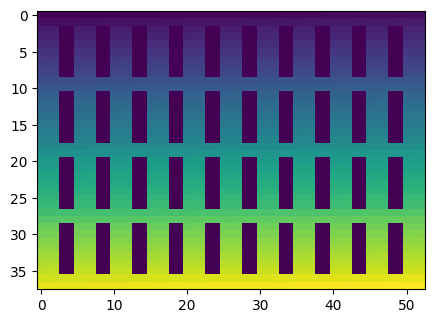

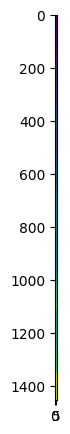

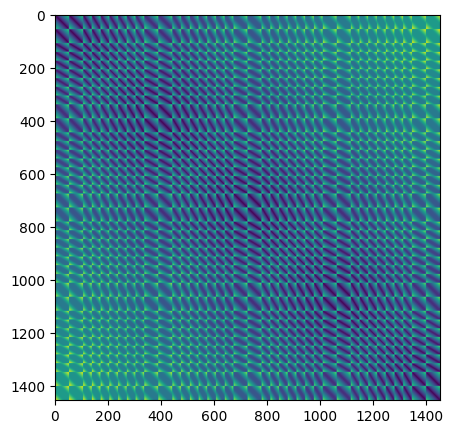

In [70]:
import os
import signal
import numpy as np
import matplotlib.pyplot as plt
from subprocess import Popen, PIPE, STDOUT
    
process = Popen('./src/model-tester', stdin=PIPE, stdout=PIPE)

read_stdout = lambda process : [int(val) for val in process.stdout.readline().decode("utf-8").strip("\n").split(",")
                                if val != '']


for i in range(3):

    line = read_stdout(process)

    shape = line[:2]
    data = line[2:]

    table = np.array(data)
    table = table.reshape(shape)

    plt.figure(figsize = (5, 5))
    plt.imshow(table)
    plt.show()



